In [1]:
from tensorflow import keras

# 데이터 삽입
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# 모델을 만드는 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

: 

: 

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


: 

: 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# history를 담아보자
# vervose=0 으로 지정해주면 훈련과정을 나타내지 않는다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=1)
print(history.history.keys())
# loss와 accuracy가 포함되어 있다.

Epoch 1/5
1500/1500 [==============================] - 1s 777us/step - loss: 0.5275 - accuracy: 0.8169
Epoch 2/5
1500/1500 [==============================] - 1s 777us/step - loss: 0.3949 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 1s 779us/step - loss: 0.3567 - accuracy: 0.8706
Epoch 4/5
1500/1500 [==============================] - 1s 780us/step - loss: 0.3319 - accuracy: 0.8793
Epoch 5/5
1500/1500 [==============================] - 1s 790us/step - loss: 0.3106 - accuracy: 0.8859
dict_keys(['loss', 'accuracy'])


: 

: 

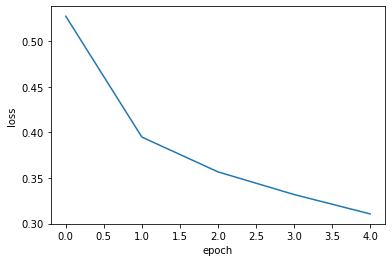

: 

: 

In [ ]:
# loss를 그래프로 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

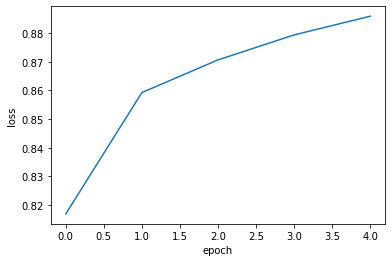

: 

: 

In [ ]:
# accuracy를 그래프로 출력
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## epoch를 20으로 올려서 그래프를 그려보자

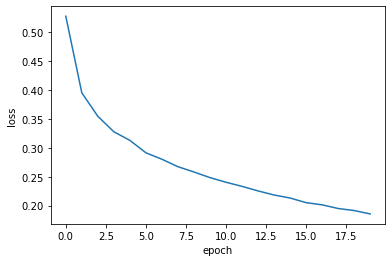

: 

: 

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 맞다 과대적합.
이번에는 훈련세트와 더불어서 검증세트도 함께 출력해보자

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

: 

: 

In [ ]:
# history에 담긴 값은?
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


: 

: 

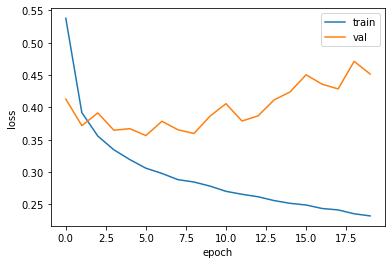

: 

: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## Adam 옵티마이저를 사용해서 다시 출력해보자

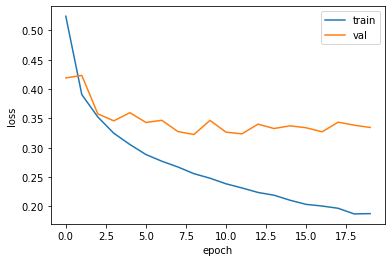

: 

: 

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 검증세트의 loss가 증가하지 않고 유지되는 것을 확인할 수 있다.

## 신경망의 대표적 규제방법, 드롭아웃

In [ ]:
# 드롭아웃 은닉층은 랜덤하게 뉴런을 드롭아웃해서 과대적합을 막는다.
# 드롭아웃 은닉층을 추가해보자
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


: 

: 

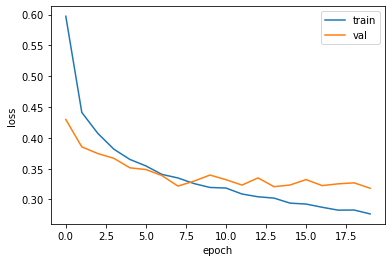

: 

: 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 드롭아웃을 통해 조금 더 정확한 예측이 가능해졌지만, 가장 좋은 에포크는 10이라는 것을 알 수 있다.

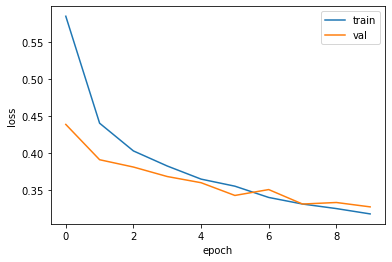

: 

: 

In [ ]:
# 에포크를 10으로 줘서 다시 학습을 시켜보자
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 모델 저장

In [ ]:
# 훈련한 모델의 파라미터를 저장하는 save_weights() 메서드
model.save_weights('model-weights.h5')
# 훈련한 모델의 파라미터를 불러오는 메서드
model.load_weights('model-weights.h5')

# 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드
model.save('model-whole.h5')
# 불러오기
model = keras.models.load_model('model-whole.h5')

: 

: 

## 가장 높은 predict 값 찾기

In [ ]:
import numpy as np
# argmax : 최대값을 구해 인덱스 값을 반환
# axis를 -1로 주면 마지막 인덱스 기준
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))
# 정확도를 얻을 수 있다. (원리는 잘 모르겠지만... 나중엔 이해하겠지..?)

375/375 [==============================] - 0s 588us/step
0.8815


: 

: 

## 콜백
모델을 훈련하는 도중에 우리가 지정한 동작을 수행하는 것  

## 조기종료

4


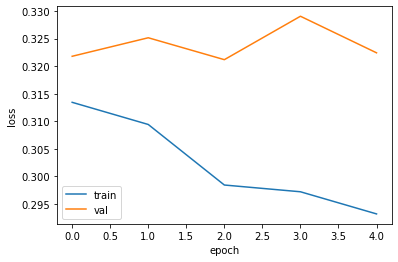

: 

: 

In [ ]:
# ModelCheckpoint() : 훈련한 모델 중 가장 낮은 손실값을 가지는 모델을 저장한다.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-model.h5', save_best_only=True)

# patience=2 : 두번까지 더 가보고 loss가 줄어들지 않으면 멈춘다.
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
